In [1]:
import numpy as np

In [128]:
X_ut = np.load("/home3/ebrahim/what-is-brainscore/temp_data_all/temp_data_pereira/X_gpt2-large-untrained-sp-hfgpt_0.npz")
X_t = np.load("/home3/ebrahim/what-is-brainscore/temp_data_all/temp_data_pereira/X_gpt2-large-sp-hfgpt.npz")

In [4]:
X_ut.keys()

KeysView(NpzFile '/home3/ebrahim/what-is-brainscore/temp_data_all/temp_data_pereira/X_gpt2-large-untrained-sp-hfgpt_0.npz' with keys: encoder.h.0, embedding+pos, static_embed, static_pos)

In [131]:
BIL = X_ut['encoder.h.0']
static = X_ut['embedding+pos']
BIL_trained = X_t['encoder.h.21']

In [55]:
dl = np.load('/home3/ebrahim/what-is-brainscore/temp_data_all/data_labels_pereira.npy')
y = []
for d in dl:
    if '243' in d:
        y.append(0)
    if '384' in d:
        y.append(1)
        
y = np.array(y)

In [56]:
text_labels = np.load('/home3/ebrahim/what-is-brainscore/temp_data_all/text_by_labels_pereira.npy')

In [57]:
from sklearn.linear_model import LogisticRegressionCV

In [58]:
idxs_243 = np.argwhere(y==0)
idxs_384 = np.argwhere(y==1)
np.random.shuffle(idxs_243)
np.random.shuffle(idxs_384)

In [115]:
def return_idxs(dl, exp, pn):
    idxs = []
    for j, d in enumerate(dl):
        if exp in d:
            if int(d[-1])==int(pn):
                idxs.append(j)
                
    return np.array(idxs)

In [122]:
def evaluate_exp_decoding(X,y,dl):
    score_folds = []
    exp = {'243': [0,1,2], '384':[0,1,2,3]}
    for e, pn in exp.items():
        for p in pn:
            test_idxs = return_idxs(dl, e, p)
            train_idxs = np.setdiff1d(np.arange(627), test_idxs)
            X_train = X[train_idxs].squeeze()
            X_test = X[test_idxs].squeeze()
            y_train = y[train_idxs].squeeze()
            y_test = y[test_idxs].squeeze()
            clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000).fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            score_folds.append(score)
            
    return score_folds

In [123]:
scores_BIL = evaluate_exp_decoding(BIL, y, dl)

In [125]:
scores_static = evaluate_exp_decoding(static, y, dl)

In [132]:
scores_BIL_trained = evaluate_exp_decoding(BIL_trained, y, dl)

In [126]:
print(scores_BIL, scores_static)

[0.6881720430107527, 0.7236842105263158, 0.6891891891891891, 0.9375, 0.78125, 0.8541666666666666, 0.875] [0.4838709677419355, 0.5921052631578947, 0.5405405405405406, 0.875, 0.84375, 0.8645833333333334, 0.84375]


In [127]:
np.mean(scores_BIL)

0.7927088727704178

In [133]:
np.mean(scores_BIL_trained)

0.9379980574802307

In [140]:
model_names = np.hstack((np.repeat('Trained', 7), np.repeat('Untrained', 7)))

In [143]:
import pandas as pd
exp_decode = pd.DataFrame({'Accuracy': np.hstack((scores_BIL_trained, scores_BIL)), 'Model':model_names})

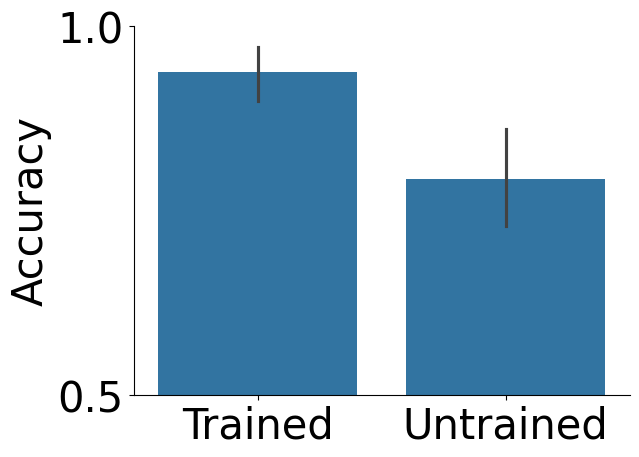

In [157]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(data=exp_decode, y='Accuracy', x='Model')
sns.despine()
plt.ylim(0.5, 1)
plt.ylabel("Accuracy", fontsize=30)
plt.yticks([0.5, 1], fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('')
plt.savefig('/home3/ebrahim/what-is-brainscore/figures/pereira/exp-decode.pdf')